In [2]:
import numpy as np
import matplotlib.pyplot as plt


Exercise 3.1

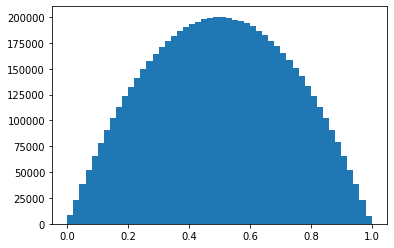

In [7]:
N = 10000000

def p(x):
    return 6 * x * (1 - x)

xmax = 1
ymax = max(p(np.linspace(0,1)))

x = np.random.uniform(0,1, N)
y = np.random.uniform(0,ymax,N)

z = x[y < p(x)]

binning_interval = .02
number_of_bins = 1/binning_interval

plt.hist(z, bins = int(number_of_bins))
# plt.plot(z, p(z) * len(z)/number_of_bins, 'b-')

plt.show()

Exercise 3.2

For N = 1.000000E+07 Mass: 0.0685569 and Mass Error: 0.0000902
For N = 1.000000E+07 Area: 0.3664856 and Area Error: 0.0003649

For N = 1.000000E+05 Mass: 0.0675581 and Mass Error: 0.0008924
For N = 1.000000E+05 Area: 0.3638000 and Area Error: 0.0036371



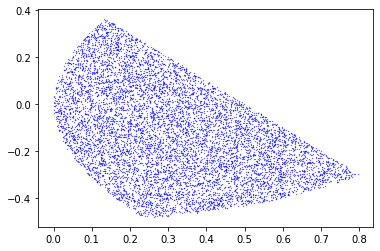

In [6]:
Nlist = [int(1e7), int(1e5)]
seed = 42
np.random.seed(seed)

def surface_density(x,y):
    return x**2 + y**2

def area_per_point(x,y):
    return x / x

for N in Nlist:
    m_accum = 0
    msq_accum = 0

    area_accum = 0
    areasq_accum = 0
    
    Area = 4 #The shape is defined inside a square from -1 to 1 (look at x = np.random.uniform(-1,1))

    # for n in range(int(N)):
    #     x = np.random.uniform(-1,1)
    #     y = np.random.uniform(-1,1)

    #     if (x**2 + 4*y**2 < 1) and (y**2 < x) and (x + y < .5):
    #         m_accum += surface_density(x, y) #Adding surface density at x,y
    #         msq_accum += surface_density(x, y)**2
    #         area_accum += 1 #Adding area at x,y
    #         areasq_accum += 1 

    #     else:
    #         pass #Just to make it easier to understand that conceptually you just add zero to the accumulator variables

    x = np.random.uniform(-1,1,int(N))
    y = np.random.uniform(-1,1,int(N))
    xgood = x[(x**2 + 4*y**2 <= 1) & (y**2 < x) & (x + y < .5) ]
    ygood = y[(x**2 + 4*y**2 <= 1) & (y**2 < x) & (x + y < .5) ]

    m_accum = surface_density(xgood, ygood)
    msq_accum = surface_density(xgood, ygood)**2
    area_accum = area_per_point(xgood, ygood)
    areasq_accum = area_per_point(xgood, ygood)**2

    mavg = np.sum(m_accum)/N
    msqavg = np.sum(msq_accum)/N
    areaavg = np.sum(area_accum)/N
    areasqavg = np.sum(areasq_accum)/N

    # mavg = m_accum/N
    # msqavg = msq_accum/N
    # areaavg = area_accum/N
    # areasqavg = areasq_accum/N

    m = mavg * Area
    m_std = np.sqrt((msqavg - mavg**2)/N) * Area
    area = areaavg * Area
    area_std = np.sqrt((areasqavg - areaavg**2)/N) * Area        

    print('For N = {:E} Mass: {:.7f} and Mass Error: {:.7f}'.format(N,m, m_std))
    print('For N = {:E} Area: {:.7f} and Area Error: {:.7f}\n'.format(N,area, area_std))

plt.plot(xgood, ygood, 'b.', markersize=0.5)
plt.show()



Professor Solution

area = 0.35972
mass = 0.06709122442303989 +- 0.0012925865588940082


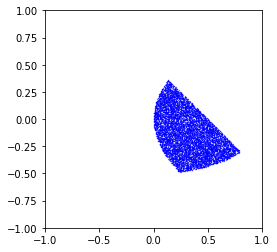

In [7]:
def sigma(x, y):
    return x**2 + y**2

N = int(1e5)
seed = 42

np.random.seed(seed)

sum0 = 0
sum1 = 0
sum2 = 0
xp = []
yp = []
for i in range(N):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)

    # Retain points inside the unit circle, below one line, above
    # another line, and to the left of a third.
    
    if x**2 + 4*y**2 <= 1 \
       and y**2 < x \
       and x+y < 0.5:
        xp.append(x)
        yp.append(y)
        sum0 += 1
        s = sigma(x,y)
        sum1 += s
        sum2 += s**2

area = 4*float(sum0)/N
print('area =', area)
sbar = sum1/sum0
sbar2 = sum2/sum0
print('mass =', area*sbar , '+-', \
       area*sbar/np.sqrt(sum0) + area*np.sqrt((sbar2-sbar**2)/sum0))

plt.xlim(-1,1)
plt.ylim(-1,1)
ax = plt.gca()
ax.set_aspect('equal')
plt.plot(xp, yp, 'b.', markersize=0.5)
plt.show()




In [61]:
def area_per_point(x,y):
    return x /x
    

In [53]:
x = np.random.uniform(-1,1,int(N))
y = np.random.uniform(-1,1,int(N))
    

In [54]:
xgood = x[(x**2 + 4*y**2 < 1) & (y**2 < x) & (x + y < .5) ]

In [62]:
area_per_point(xgood, ygood)

array([1., 1., 1., ..., 1., 1., 1.])